In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import Sequential, layers
import matplotlib.pyplot as plt
import os
from PIL import Image
from PIL import ImageOps
import sklearn

In [2]:
train_normal_path = r"C:\Ciencia de datos\Proyecto Chest X-Ray Images (Pneumonia)\archive\chest_xray\train\NORMAL"
train_pneumonia_path = r"C:\Ciencia de datos\Proyecto Chest X-Ray Images (Pneumonia)\archive\chest_xray\train\PNEUMONIA"
val_normal_path = r"C:\Ciencia de datos\Proyecto Chest X-Ray Images (Pneumonia)\archive\chest_xray\val\NORMAL"
val_pneumonia_path = r"C:\Ciencia de datos\Proyecto Chest X-Ray Images (Pneumonia)\archive\chest_xray\val\PNEUMONIA"
test_normal_path = r"C:\Ciencia de datos\Proyecto Chest X-Ray Images (Pneumonia)\archive\chest_xray\test\NORMAL"
test_pneumonia_path = r"C:\Ciencia de datos\Proyecto Chest X-Ray Images (Pneumonia)\archive\chest_xray\test\PNEUMONIA"
paths = [train_normal_path, train_pneumonia_path, val_normal_path, val_pneumonia_path, test_normal_path, test_pneumonia_path]

In [3]:
imagenes_train_normal = []
imagenes_train_pneumonia = []
imagenes_val_normal = []
imagenes_val_pneumonia = []
imagenes_test_normal = []
imagenes_test_pneumonia = []
ancho, alto = (400, 400)
imagenes = [imagenes_train_normal, imagenes_train_pneumonia, imagenes_val_normal, imagenes_val_pneumonia, imagenes_test_normal, imagenes_test_pneumonia]

for i, path in enumerate(paths):
    for filename in os.listdir(path):
        f = os.path.join(path, filename)
        # checking if it is a file
        if os.path.isfile(f):
            img = Image.open(f)
            img = img.resize(size = (ancho, alto))
            img = ImageOps.grayscale(img)
            img = np.asarray(img)
            imagenes[i].append(img)

In [4]:
print(len(imagenes_train_normal))
print(len(imagenes_train_pneumonia))
print(len(imagenes_val_normal))
print(len(imagenes_val_pneumonia))
print(len(imagenes_test_normal))
print(len(imagenes_test_pneumonia))

1341
3875
8
8
234
390


In [5]:
imagenes_train_normal = np.array(imagenes_train_normal)
imagenes_train_pneumonia = np.array(imagenes_train_pneumonia)
imagenes_val_normal = np.array(imagenes_val_normal)
imagenes_val_pneumonia = np.array(imagenes_val_pneumonia)
imagenes_test_normal = np.array(imagenes_test_normal)
imagenes_test_pneumonia = np.array(imagenes_test_pneumonia)

In [6]:
np.save(r"C:\Ciencia de datos\Proyecto Chest X-Ray Images (Pneumonia)\Informacion transformada\train\normal", imagenes_train_normal)
np.save(r"C:\Ciencia de datos\Proyecto Chest X-Ray Images (Pneumonia)\Informacion transformada\train\pneumonia", imagenes_train_pneumonia)
np.save(r"C:\Ciencia de datos\Proyecto Chest X-Ray Images (Pneumonia)\Informacion transformada\val\normal", imagenes_val_normal)
np.save(r"C:\Ciencia de datos\Proyecto Chest X-Ray Images (Pneumonia)\Informacion transformada\val\pneumonia", imagenes_val_pneumonia)
np.save(r"C:\Ciencia de datos\Proyecto Chest X-Ray Images (Pneumonia)\Informacion transformada\test\normal", imagenes_test_normal)
np.save(r"C:\Ciencia de datos\Proyecto Chest X-Ray Images (Pneumonia)\Informacion transformada\test\pneumonia", imagenes_test_pneumonia)

# Cargar las imagenes transformadas a partir de aca

In [25]:
ancho, alto = (300, 300)
train_normal = np.load(file = r"C:\Ciencia de datos\Proyecto Chest X-Ray Images (Pneumonia)\Informacion transformada\train\normal.npy")
train_pneumonia = np.load(file = r"C:\Ciencia de datos\Proyecto Chest X-Ray Images (Pneumonia)\Informacion transformada\train\pneumonia.npy")
val_normal = np.load(file = r"C:\Ciencia de datos\Proyecto Chest X-Ray Images (Pneumonia)\Informacion transformada\val\normal.npy")
val_pneumonia = np.load(file = r"C:\Ciencia de datos\Proyecto Chest X-Ray Images (Pneumonia)\Informacion transformada\val\pneumonia.npy")
test_normal = np.load(file = r"C:\Ciencia de datos\Proyecto Chest X-Ray Images (Pneumonia)\Informacion transformada\test\normal.npy")
test_pneumonia = np.load(file = r"C:\Ciencia de datos\Proyecto Chest X-Ray Images (Pneumonia)\Informacion transformada\test\pneumonia.npy")

In [26]:
x_train = np.concatenate((train_normal, train_pneumonia), axis = 0)
x_val = np.concatenate((val_normal, val_pneumonia), axis = 0)
x_test = np.concatenate((test_normal, test_pneumonia), axis = 0)

In [27]:
x_train.shape

(5216, 400, 400)

# Los normales se clasificaran como 1 y pneumonia como 0

In [28]:
y_train_normal = np.ones(len(train_normal))
y_train_pneumonia = np.zeros(len(train_pneumonia))
y_val_normal = np.ones(len(val_normal))
y_val_pneumonia = np.zeros(len(val_pneumonia))
y_test_normal = np.ones(len(test_normal))
y_test_pneumonia = np.zeros(len(test_pneumonia))

In [29]:
y_train = np.concatenate((y_train_normal, y_train_pneumonia), axis = 0)
y_val = np.concatenate((y_val_normal, y_val_pneumonia), axis = 0)
y_test = np.concatenate((y_test_normal, y_test_pneumonia), axis = 0)

In [30]:
x_train, y_train = sklearn.utils.shuffle(x_train, y_train)
x_val, y_val = sklearn.utils.shuffle(x_val, y_val)
x_test, y_test = sklearn.utils.shuffle(x_test,y_test)

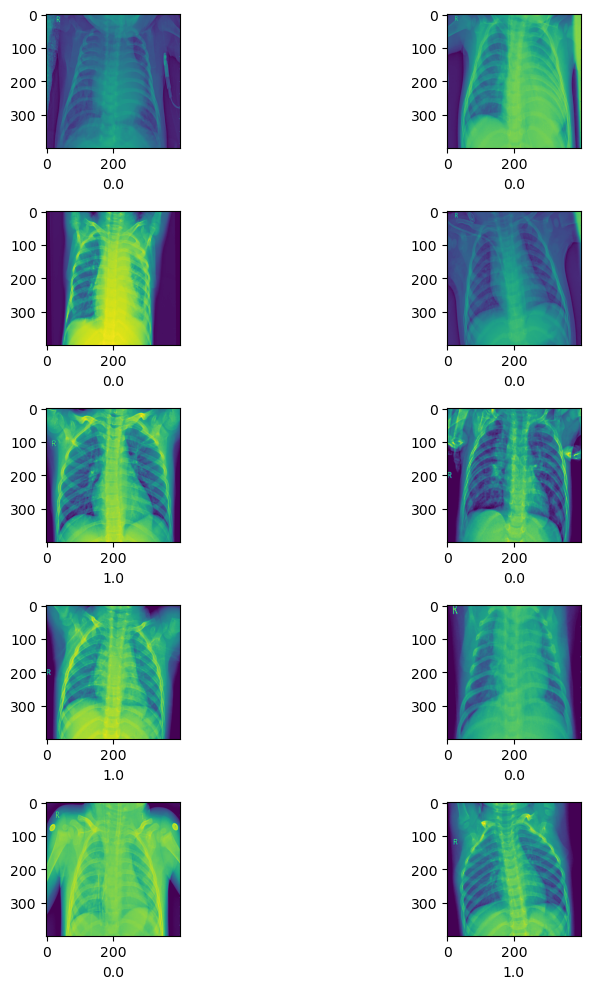

In [31]:
fig = plt.figure(figsize = (10,10))
for i in range(1,11):
    ax = fig.add_subplot(5,2,i)
    ax.imshow(x_train[i])
    ax.set_xlabel(y_train[i])
fig.tight_layout()


In [32]:
ancho, alto = (400, 400)
epochs = 10

In [33]:
x_train = np.concatenate((x_train, x_val), axis = 0)
y_train = np.concatenate((y_train, y_val), axis = 0)

In [34]:
x_train = x_train / 255

In [35]:
model = Sequential()
model.add(layers.Conv2D(filters = 64, kernel_size = (5,5), activation = "relu", input_shape = (ancho, alto, 1)))
model.add(layers.MaxPooling2D((5, 5)))
model.add(layers.Conv2D(64, (5,5), activation = "relu"))
model.add(layers.MaxPooling2D((5, 5)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(2, activation = 'softmax'))

In [36]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 396, 396, 64)      1664      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 79, 79, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 75, 75, 64)        102464    
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 15, 15, 64)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 14400)             0         
                                                                 
 dense_4 (Dense)             (None, 64)               

In [37]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=["accuracy"])

history = model.fit(x_train, y_train, epochs = epochs, 
                    validation_split = 0.2)

Epoch 1/10
131/131 [==============================] - 269s 2s/step - loss: 0.2745 - accuracy: 0.8777 - val_loss: 0.1224 - val_accuracy: 0.9561
Epoch 2/10
131/131 [==============================] - 271s 2s/step - loss: 0.1171 - accuracy: 0.9539 - val_loss: 0.1065 - val_accuracy: 0.9580
Epoch 3/10
131/131 [==============================] - 277s 2s/step - loss: 0.0978 - accuracy: 0.9656 - val_loss: 0.0961 - val_accuracy: 0.9666
Epoch 4/10
131/131 [==============================] - 276s 2s/step - loss: 0.0895 - accuracy: 0.9654 - val_loss: 0.0942 - val_accuracy: 0.9694
Epoch 5/10
131/131 [==============================] - 269s 2s/step - loss: 0.0688 - accuracy: 0.9737 - val_loss: 0.0810 - val_accuracy: 0.9771
Epoch 6/10
131/131 [==============================] - 269s 2s/step - loss: 0.0571 - accuracy: 0.9775 - val_loss: 0.0777 - val_accuracy: 0.9761
Epoch 7/10
131/131 [==============================] - 267s 2s/step - loss: 0.0470 - accuracy: 0.9806 - val_loss: 0.0570 - val_accuracy: 0.9838

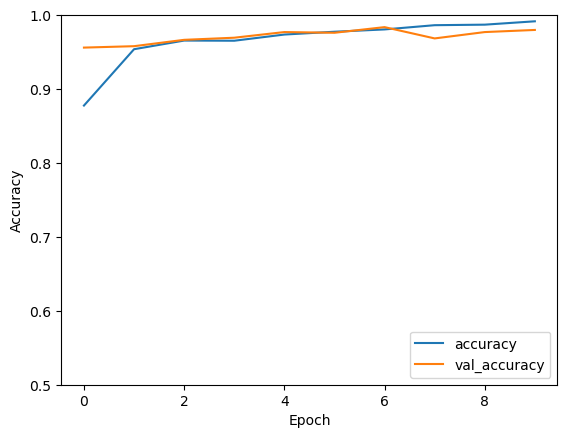

In [38]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')



In [39]:
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

20/20 - 10s - loss: 459.6652 - accuracy: 0.7163 - 10s/epoch - 521ms/step


In [40]:
model.save(r"C:\Ciencia de datos\Proyecto Chest X-Ray Images (Pneumonia)\PneumoniaModel.keras")

# Predecir

In [41]:
ruta_imagen = r"C:\Ciencia de datos\Proyecto Chest X-Ray Images (Pneumonia)\imagen_prueba.jpg" #La imagen es de una persona con neumonia
img = Image.open(ruta_imagen)
img = img.resize(size = (ancho, alto))
img = ImageOps.grayscale(img)
img = np.asarray(img)

In [42]:
img

array([[0, 1, 1, ..., 0, 0, 0],
       [0, 1, 1, ..., 0, 0, 0],
       [1, 1, 2, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

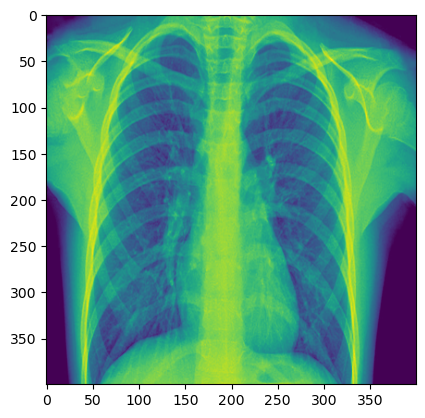

In [43]:
plt.imshow(img)

In [44]:
img = img.reshape(1, ancho, alto)

In [45]:
img

array([[[0, 1, 1, ..., 0, 0, 0],
        [0, 1, 1, ..., 0, 0, 0],
        [1, 1, 2, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]], dtype=uint8)

In [46]:
model.predict(img)

1/1 [==============================] - 0s 151ms/step


array([[1., 0.]], dtype=float32)

In [47]:
model.predict(x_train[0].reshape(1,ancho,alto))

1/1 [==============================] - 0s 99ms/step


array([[9.9999857e-01, 1.4042771e-06]], dtype=float32)

In [48]:
y_train[0]

0.0